In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 1
#%aimport 

# Ham attack on adaline classifier

In [2]:
import pickle

with open('../datasets/processed/trec2007-1607061515-features.dat', 'rb') as infile:
    X = pickle.load(infile)

with open('../datasets/processed/trec2007-1607061515-labels.dat', 'rb') as infile:
    Y = pickle.load(infile)

print('X is a %s \t %s' % (X.shape, type(X)))
print('Y is a %s \t %s' % (Y.shape, type(Y)))

X is a (75419, 10000) 	 <class 'numpy.ndarray'>
Y is a (75419, 1) 	 <class 'numpy.matrixlib.defmatrix.matrix'>


## prepare dataset

In [4]:
## reduce dataset to go faster during prototyping
N_keep = 20000
x = X[:N_keep]
y = Y[:N_keep]

## ham attack

In [5]:
percentage_poisoned = 0.1 ## percentage of the dataset under the attacker's control

N, D = x.shape ## number of N: samples, D: features
num_poisoned = int(N*percentage_poisoned)


In [21]:
## find the most salient (positive) features, indicative of the ham class
ham_indices = y[y == 0]
print(ham_indices.shape)
hams = x[ham_indices, :][0, :, :]
hams.shape

(1, 4891)


(4891, 10000)

[0 0 0 ..., 0 0 0]


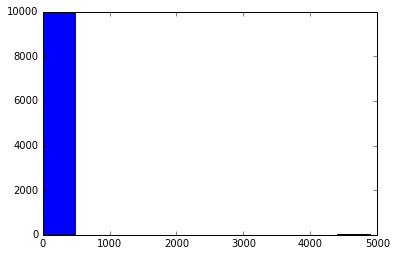

In [41]:
count = np.sum(hams, axis=0)
print(count)
plt.hist(count)
plt.show()

In [40]:
np.sort(count)[::-1][:500]


array([4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891,
       4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891,
       4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891,
       4891, 4891, 4891, 4891, 4891, 4891, 4891, 4891,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [58]:
salient = (count != 0) ## feature indices that are salient for ham class
print(salient.shape)
salient

(10000,)


array([False, False, False, ..., False, False, False], dtype=bool)

In [63]:
ham_attack = np.zeros((1, D))
ham_attack[:, salient] = 1
ham_attack = np.array([ham_attack,]*num_poisoned)
ham_attack = ham_attack[:, 0, :]

print(ham_attack.shape)
print(ham_attack)
ham_attack.sum()/41

(2000, 10000)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


2000.0

In [64]:
x = np.append(x, ham_attack, axis=0)
print(x.shape)
x

(22000, 10000)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### contamination assumption

In [65]:
poisoned_labels = np.ones((num_poisoned, 1))
print(poisoned_labels.shape)

y = np.append(y, poisoned_labels, axis=0)
print(y.shape)
y

(2000, 1)
(22000, 1)


matrix([[ 1.],
        [ 0.],
        [ 1.],
        ..., 
        [ 1.],
        [ 1.],
        [ 1.]])

## training phase

In [66]:
add_bias = lambda x: np.insert(x, 0, values=1, axis=1) # add bias term
convert_labels = lambda y: y*2 - 1                     # Convert labels to 1 and -1

In [68]:
%aimport adaline
from adaline import max_iters

x = add_bias(x)
y = convert_labels(y)

weights, cost, error = adaline.train_adaline(features=x, labels=y,
                                             rate=0.061,
                                             termination_condition=max_iters(100),
                                             verbose=True)

iteration 1:	cost = 1.000
iteration 2:	cost = 0.835
iteration 3:	cost = 0.718
iteration 4:	cost = 0.631
iteration 5:	cost = 0.564
iteration 6:	cost = 0.512
iteration 7:	cost = 0.469
iteration 8:	cost = 0.433
iteration 9:	cost = 0.403
iteration 10:	cost = 0.378
iteration 11:	cost = 0.356
iteration 12:	cost = 0.336
iteration 13:	cost = 0.320
iteration 14:	cost = 0.305
iteration 15:	cost = 0.291
iteration 16:	cost = 0.279
iteration 17:	cost = 0.269
iteration 18:	cost = 0.259
iteration 19:	cost = 0.250
iteration 20:	cost = 0.242
iteration 21:	cost = 0.235
iteration 22:	cost = 0.228
iteration 23:	cost = 0.222
iteration 24:	cost = 0.216
iteration 25:	cost = 0.210
iteration 26:	cost = 0.205
iteration 27:	cost = 0.201
iteration 28:	cost = 0.196
iteration 29:	cost = 0.192
iteration 30:	cost = 0.188
iteration 31:	cost = 0.185
iteration 32:	cost = 0.181
iteration 33:	cost = 0.178
iteration 34:	cost = 0.175
iteration 35:	cost = 0.172
iteration 36:	cost = 0.170
iteration 37:	cost = 0.167
iteration 

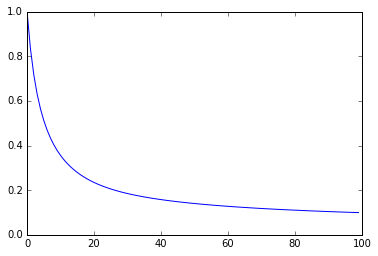

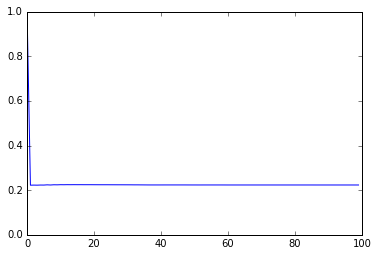

In [69]:
plt.plot(cost)
plt.ylim(0, cost[0])
plt.show()
plt.plot(error)
plt.ylim(0, error[0])
plt.show()

## test phase

In [70]:
%aimport adaline

x_test = X[N_keep:N_keep+1000]
y_test = Y[N_keep:N_keep+1000]

x_test = add_bias(x_test)
y_test = convert_labels(y_test)

labels, cost = adaline.test_adaline(weights=weights, features=x_test)

In [71]:
## error
np.sum(y_test != labels)/x_test.shape[0] # mean error over samples

0.308